In [25]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

#### ZHVI

In [26]:
zhvi_zip_path = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1678040670'
zhvi_zip = pd.read_csv(zhvi_zip_path)

In [27]:
phx_zhvi = zhvi_zip[(zhvi_zip.City=='Phoenix')&(zhvi_zip.State=='AZ')].copy()

In [28]:
phx_zhvi.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
169,94748,169,85032,zip,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,126395.537753,126654.134688,126949.696526,127638.827864,128398.824909,129161.294829,129947.942841,130731.728854,131666.196861,132615.190559,133565.036297,134397.808675,135079.785385,135718.275250,136323.740396,136966.895739,137640.519705,138281.870473,138898.653213,139509.141470,140142.159438,140698.935577,141251.747662,141782.728792,142297.776027,142763.547167,143320.079003,143919.746011,144515.906667,145136.014454,145716.100414,146343.615774,146816.097124,147398.112584,147944.982184,148676.180399,149395.625800,150260.972595,150962.494523,151714.270262,152443.707561,153268.719968,154124.077192,155036.882508,156039.328576,157017.793618,157879.216417,158611.019617,159232.235437,159938.110409,160817.845492,161958.795913,163341.215946,164882.209667,166981.567269,169548.936830,172045.5

#### ZORI

In [29]:
zori_zip_path='https://files.zillowstatic.com/research/public_csvs/zori/Zip_zori_sm_month.csv?t=1678040670'
zori_zip = pd.read_csv(zori_zip_path)

In [30]:
phx_zori = zori_zip[(zori_zip.City=='Phoenix')&(zori_zip.State=='AZ')].copy()

In [31]:
phx_zori.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
161,94748,169,85032,zip,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,982.084876,982.250369,971.179324,990.132251,997.676783,1006.454362,1017.231906,1019.96642,1028.449428,1006.368838,981.656179,977.838054,997.493442,1031.836662,1052.466100,1060.508633,1068.950130,1067.794984,1062.671216,1058.533673,1053.226608,1061.022652,1066.968818,1080.256610,1078.334981,1091.498980,1089.356040,1107.623986,1104.796154,1120.254737,1128.916565,1137.175702,1137.870987,1141.765285,1124.351864,1128.281461,1134.038829,1160.652089,1185.967445,1186.679985,1204.954077,1206.343363,1234.664340,1231.822312,1233.446974,1221.755921,1230.259465,1230.998574,1237.698486,1248.505233,1257.571659,1255.143161,1261.569061,1263.771557,1288.506042,1300.405523,1324.713058,1334.333439,1342.973426,1344.689439,1344.484325,1328.735504,1324.353443,1316.544164,1345.117503,1362.451245,1381.577725,1397.097605,1413.239126,1432.228026,1418.869388,1413.435200,1424.573295,1472.580776,1542.845322,1609.982281,1673.782337,1722.487020,1755.697894,1780.271262,1804.254288,1810.760776,1820.772824,1810.538477,1846.757065,1861.663019,1870.946549,1864.191388,1864.159950,1887.431035,1882.522423,1890.955068,1890.182133,1890.442542,1892.749601
255,94749,267,85033,zip,AZ,AZ,Phoenix,"Phoenix-Mesa-Chandler, AZ",Maricopa County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798.711246,800.725901,804.220331,811.504239,815.867770,809.985846,800.105022,786.988962,784.553399,795.561300,811.200271,826.154039,836.826784,849.117493,860.688670,872.703602,874.590467,876.101934,870.633207,869.340843,869.764901,865.914074,865.221670,872.951466,894.155181,909.222672,908.807382,901.569055,910.530310,911.191962,918.801664,922.771775,941.711018,943.654669,959.375850,971.013829,995.470605,1003.016053,1016.428095,1029.468406,1039.170324,1032.451904,1030.654395,1040.056315,1040.878468,1044.876951,1040.638721,1070.403510,1092.026595,1121.495026,1142.261073,1164.703904,1163.766614,1149.587735,1139.892892,1146.469054,1164.618926,1198.437561,1208.059414,1241.512363,1293.341701,1365.327455,1396.026257,1429.982524,1486.073454,1531.717741,1520.643131,1513.454206,1519.665789,1498.779939,1518.077769,1550.014005,1592.885740,1610.992163,1636.367141,1643.227443,1594.734191,1525.425365,1490.834043,1470.685752,1504.652460,1521.591270


## Map prices

In [32]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
geo = gpd.read_file('../data/geo/shapefiles/Phoenix_ZCTA.shp')
geo['joinid'] = geo['GEOID20'].astype(int)
geo.head(2)

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,joinid
0,85266,85266,B5,G6350,S,50807009,2649,+33.7623670,-111.9190911,"POLYGON ((-111.97816 33.73812, -111.97813 33.7...",85266
1,85085,85085,B5,G6350,S,98725707,92484,+33.7526141,-112.0901571,"POLYGON ((-112.13525 33.79816, -112.13502 33.7...",85085


In [34]:
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')

In [35]:
villages.head(2)

,OBJECTID,NAME,ACRES,URL,INSERT_DAT,UPDATE_DAT,ANID,geometry
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05,2022-05-05,2445,"POLYGON ((683945.250 859952.062, 683930.250 85..."
1,17,Laveen,19579.69,https://phoenix.gov/villages/Laveen,2022-05-05,2022-05-05,2444,"POLYGON ((638589.250 843376.000, 629247.625 83..."


## FIX CRS PROJECTION

In [36]:
villages = villages.to_crs(4269)

In [39]:
villages.crs == geo.crs

True

In [40]:
phx_zhvi.shape

(44, 286)

In [41]:
own_cost = pd.merge(geo,phx_zhvi,how='left',left_on='joinid',right_on='RegionName')

In [42]:
date_cols = list(own_cost.columns[own_cost.columns.get_loc('2000-01-31'):])
cur_month = date_cols[-1]

In [43]:
own_cost = own_cost[['geometry','joinid']+date_cols]

In [44]:
#melted table for animation of multiple months (if interested)
own_cost_melt = pd.melt(own_cost,id_vars=['joinid','geometry'],value_vars=date_cols)

In [45]:
#table for current month for visualization
own_cost_cur = own_cost[['geometry','joinid',cur_month]]

In [46]:
own_cost_cur.describe()

,joinid,2023-01-31
count,56.000000,44.000000
mean,85089.589286,440336.552374
std,112.874472,133080.646596
min,85003.000000,266476.648166
25%,85019.750000,342050.307467
50%,85036.000000,411882.203222
75%,85085.250000,513915.586046
max,85353.000000,838416.755210


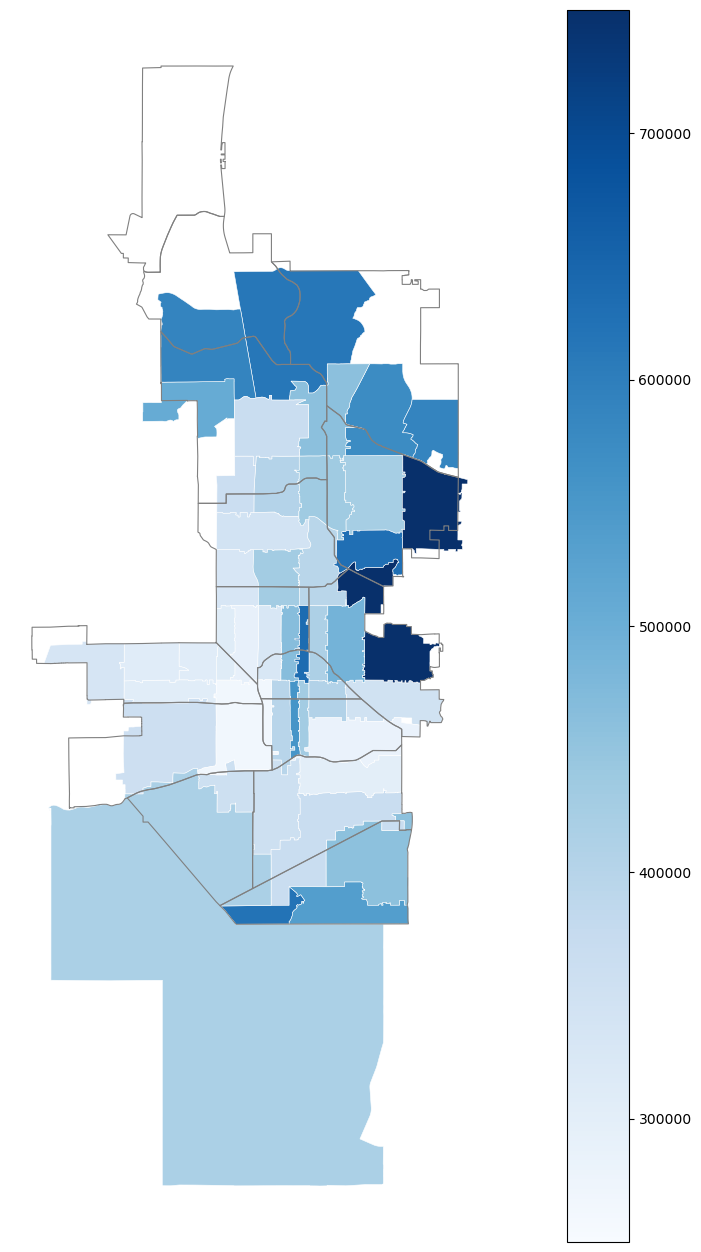

In [48]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=250000,vmax=750000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
own_cost_cur.plot(column = '2023-01-31', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
villages.plot(ax=ax,color='none',edgecolor='gray',linewidth=0.8)
fig.colorbar(sm)
#ax.set_title(f'Median Price {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
#             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')

In [ ]:
plt.savefig(f'output/test/{month}.jpg', dpi = 400) # saving each scatter plot by month

In [ ]:
def price_maps(gdf,month):
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=0,vmax=1000000)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
    sm.set_array([])
    fig.colorbar(sm)
    gdf.plot(column = 'value', cmap='Blues', norm=new_norm, edgecolor="face", linewidth=0.4, ax = ax)
    ax.set_title(f'Median Price {month[:3]} 20{month[-2:]}', color = 'k',  fontsize = 15)
   #             xy = (0.6,.05), xycoords = 'figure fraction', fontsize = 11, color = 'k')
    plt.savefig(f'Zillow/City_Price/{month}.jpg', dpi = 400) # saving each scatter plot by month